In [2]:
%config InlineBackend.figure_format = 'svg'

# Scipy Review (Inspired from the scipy tutorial)

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

To access the SciPy package in a Python program, we start by importing everything from the `scipy` module.

In [2]:
from scipy import *

If we only need to use part of the SciPy framework we can selectively include only those modules we are interested in. For example, to include the linear algebra package under the name `la`, we can do:

In [3]:
import scipy.linalg as la

## Special functions

A large number of mathematical special functions are important for many computional physics problems. SciPy provides implementations of a very extensive set of special functions. For details, see the list of functions in the reference documention at http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

To demonstrate the typical usage of special functions we will look in more detail at the Bessel functions:

In [4]:
#
# The scipy.special module includes a large number of Bessel-functions
# Here we will use the functions jn and yn, which are the Bessel functions 
# of the first and second kind and real-valued order. We also include the 
# function jn_zeros and yn_zeros that gives the zeroes of the functions jn
# and yn.
#
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [5]:
n = 0    # order
x = 0.0

# Bessel function of first kind
print "J_%d(%f) = %f" % (n, x, jn(n, x))

x = 1.0
# Bessel function of second kind
print "Y_%d(%f) = %f" % (n, x, yn(n, x))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


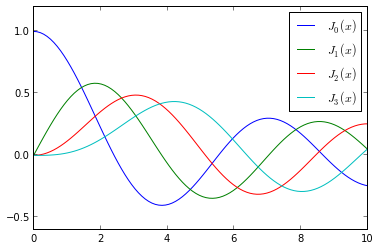

In [6]:
x = linspace(0, 10, 100)

fig, ax = subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

In [7]:
# zeros of Bessel functions
n = 0 # order
m = 4 # number of roots to compute
jn_zeros(n, m)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444])

## Integration

### Numerical integration: quadrature

Numerical evaluation of a function of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.



In [8]:
from scipy.integrate import quad, dblquad, tplquad

The `quad` function takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function (try `help(quad)` for details).

The basic usage is as follows:

In [9]:
# define a simple function for the integrand
def f(x):
    return x

In [10]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

print "integral value =", val, ", absolute error =", abserr 

integral value = 0.5 , absolute error = 5.55111512313e-15


If we need to pass extra arguments to integrand function we can use the `args` keyword argument:

In [11]:
def integrand(x, n):
    """
    Bessel function of first kind and order n. 
    """
    return jn(n, x)


x_lower = 0  # the lower limit of x
x_upper = 10 # the upper limit of x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))

print val, abserr 

0.736675137081 9.38925687719e-13


For simple functions we can use a lambda function (name-less function) instead of explicitly defining a function for the integrand:

In [12]:
val, abserr = quad(lambda x: exp(-x ** 2), -Inf, Inf)

print "numerical  =", val, abserr

analytical = sqrt(pi)
print "analytical =", analytical

numerical  = 1.77245385091 1.42026367809e-08
analytical = 1.77245385091


As show in the example above, we can also use 'Inf' or '-Inf' as integral limits.

Higher-dimensional integration works in the same way:

In [13]:
def integrand(x, y):
    return exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print val, abserr 

0.785398163397 1.63822994214e-13


Note how we had to pass lambda functions for the limits for the y integration, since these in general can be functions of x.

# Integration of differential equations : The harmonic oscillator

An harmonic oscillator is described by the equation
\begin{equation}
\ddot x + \omega^2 x = 0
\end{equation}
where $x$ is the state variable and $\omega$ is called the frequency of the oscillar. Several examples of harmonic oscillators occur in nature: a mass attached to a spring (where $\omega = \sqrt{k/m}$), a simple pendulum under small amplitudes ($\omega = \sqrt{g/l}$), an RC circuit, and so on. 

The solution for this kind of equations as of oscillatory nature, and can be generally written as
$$
x = A\cos(\omega t + \delta),
$$
where $A$ is the amplitude and $\delta$ is the phase constant. 

> **Exercise**: Verify that the previous expression is indeed a solution by substituting it into the differential equation.

The kind of systems fullfiling this behaviour conserves the so-called mechanical energy, defined as the sum of the kinetic ($K = mv^2/2$) and potential ($U = kx^2/2$, for the mass-spring system) energies.

In the following we will use the harmonic oscillator example as the case of study in order to explore some concepts of dynamical systems.

## Numerical solution
Although we already have the full theoretical solution, we will solve the differential equation numerically in order to callibrate our procedure and then move to non-linear systems where there is no close solution.

We will use scipy to solve the differential equation. This requires to rewrite the previous linear-second-order differential equation as a set of linear-first order differential equations. This is very easy by introducing the velocity $v = \dot x$ as a second state variable:

\begin{align}
\dot x &= v,\\
\dot v &= -\omega^2 x.
\end{align}

As you can see, we have created a coupled system of differential equations. The geometrical space spanned by the coordinates $(x, v)$ is called the **phase space** of the system (actually it is generated by $(x, p)$, where $p = mv$ is the linear momentum, but there is no important difference since the mass is constant in our problem). 

We will use the submodule ```scipy.integrate.odeint``` method to solve our systems.

> **Exercise**: Check the manual for scipy.integrate.odeint and scipy.integrate.ode 

In [1]:
from scipy import integrate
%matplotlib inline
#integrate.odeint?

As you can see, you need to specify a function which returns the derivatives of the state variables, the initial conditions, and the time vector. Let's create each one of them.

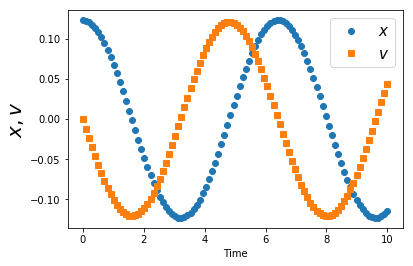

In [2]:
# global imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# global parameters
W = 0.98 # angular frequency

# initial conditions
X0 = 0.123
V0 = 0.0

# function to return the derivatives
def derivatives(state, t): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    xd  = state[1]
    xdd = -W*W*state[0]
    return xd, xdd

# solving the differential equation
state0 = np.array([X0, V0])
t = np.linspace(0, 10, 100) # dt = 0.1
state = odeint(derivatives, state0, t)

# Plot the solution
plt.plot(t, state[:,0], 'o', label=r"$x$")
plt.plot(t, state[:,1], 's', label=r"$v$")
plt.xlabel('Time')
plt.ylabel('$x, v$', fontsize=20)
plt.legend(fontsize=15)

Now, let's plot the theoretical solution.

> **Exercise** : Deduce the correct values for the amplitud and the phase, from the given initial conditions

From the given initial conditions, you can show that $A=X0$ and $\delta = 0$. Then the theoretical solution is $x = \cos(\omega t)$ and $v = -\omega \sin(\omega t)$. Let's plot the solution together with the numerical one:

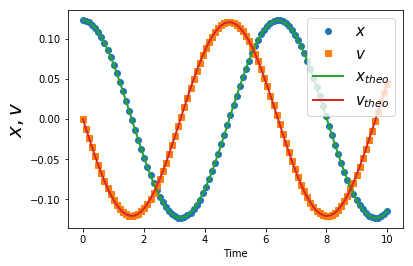

In [4]:
# Plot the solution
plt.plot(t, state[:,0], 'o', label=r"$x$")
plt.plot(t, state[:,1], 's', label=r"$v$")
plt.plot(t, X0*np.cos(W*t), '-', label=r"$x_{theo}$", lw=2)
plt.plot(t, -X0*W*np.sin(W*t), '-', label=r"$v_{theo}$", lw=2)
plt.xlabel('Time')
plt.ylabel('$x, v$', fontsize=20)
plt.legend(fontsize=15)

This shows a good numerical result. But, in order to be quantitative, we will compare exactly the difference between the theoretical and the numerical solution, as a function of time and the step size.

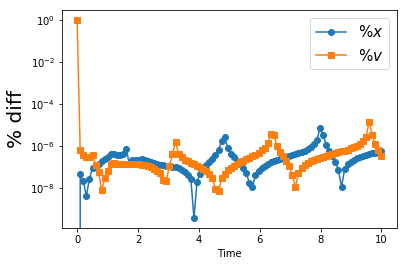

In [5]:
xtheo = X0*np.cos(W*t)
vtheo = -X0*W*np.sin(W*t)
fig, ax = plt.subplots()
xtheo[xtheo==0] = 1.0
vtheo[vtheo == 0] = 1.0
plt.plot(t, np.abs((xtheo - state[:,0])/xtheo), 'o-', label=r"$\% x$")
plt.plot(t, np.abs((vtheo - state[:,1])/vtheo), 's-', label=r"$\% v$")
plt.xlabel('Time')
plt.ylabel('% diff', fontsize=20)
ax.set_yscale("log")
plt.legend(fontsize=15)

As you can see, the difference is small bu seems to be growing with time. Let see what happens for larger times:

/Users/oquendo/miniconda3/envs/jupyterlab/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


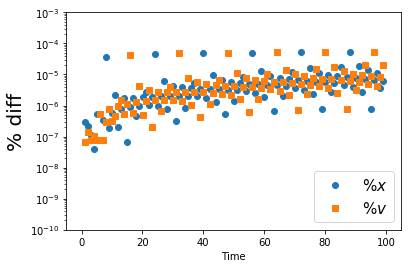

In [6]:
# solving the differential equation
t = np.linspace(0, 100, 1000) # dt = 0.1
state = odeint(derivatives, state0, t)

xtheo = X0*np.cos(W*t)
vtheo = -X0*W*np.sin(W*t)
fig, ax = plt.subplots()
plt.plot(t, np.abs((xtheo - state[:,0])/xtheo), 'o', label=r"$\% x$", markevery=10) # decrease the number of points plotted 
plt.plot(t, np.abs((vtheo - state[:,1])/vtheo), 's', label=r"$\% v$", markevery=10)
plt.xlabel('Time')
plt.ylabel('% diff', fontsize=20)
ax.set_yscale("log")
ax.set_ylim(1.0e-10, 1.0e-3)
plt.legend(fontsize=15)

Now let's decrease the time step

/Users/oquendo/miniconda3/envs/jupyterlab/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/oquendo/miniconda3/envs/jupyterlab/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


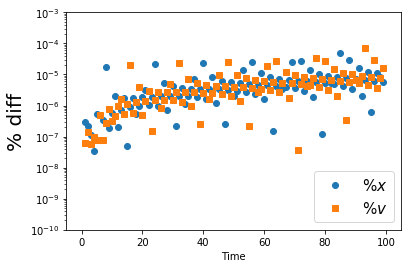

In [7]:
# solving the differential equation
t = np.linspace(0, 100, 10000) # dt = 0.01
state = odeint(derivatives, state0, t)

xtheo = X0*np.cos(W*t)
vtheo = -X0*W*np.sin(W*t)
fig, ax = plt.subplots()
plt.plot(t, np.abs((xtheo - state[:,0])/xtheo), 'o', label=r"$\% x$", markevery=100) # decrease the number of points plotted 
plt.plot(t, np.abs((vtheo - state[:,1])/vtheo), 's', label=r"$\% v$", markevery=100)
plt.xlabel('Time')
plt.ylabel('% diff', fontsize=20)
ax.set_yscale("log")
ax.set_ylim(1.0e-10, 1.0e-3)
plt.legend(fontsize=15)

The error has decreased!

Another important and useful test is to check the energy conservation:

/Users/oquendo/miniconda3/envs/jupyterlab/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


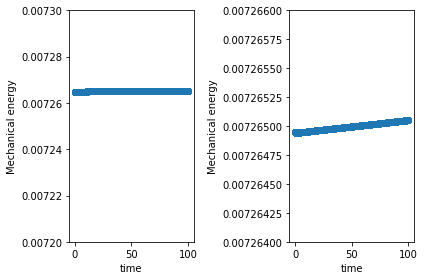

In [8]:
x = state[:,0]
v = state[:,1]
fig, ax = plt.subplots(1,2)
ax[0].plot(t, 0.5*(v*v + W*W*x*x), 'o') # assuming Mass = 1
ax[0].set_ylim(7.2e-3, 7.3e-3)
ax[0].set_xlabel("time")
ax[0].set_ylabel("Mechanical energy")
ax[1].plot(t, 0.5*(v*v + W*W*x*x), 'o') # assuming Mass = 1
ax[1].set_ylim(7.264e-3, 7.266e-3)
ax[1].set_xlabel("time")
ax[1].set_ylabel("Mechanical energy")
fig.set_tight_layout(True);

Energy is well conserved, although it seems that there is a little increase over time, which actually is not important for the scale of the simulated time.

# Phase plane
Now let's check how the phase plane looks like, for the given initial condition. For that regard, we need to plot $v$ as a function of $x$.

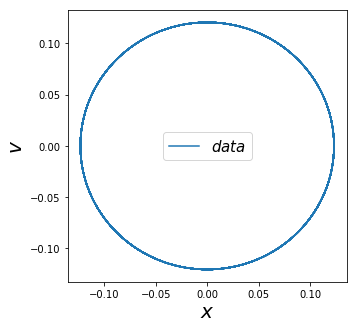

In [9]:
x = state[:,0]
v = state[:,1]
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(x, v, '-', label=r"$data$") 
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$v$', fontsize=20)
plt.legend(fontsize=15)

This is expected for the conservation of energy, which generates ellipses (circles in our case) for an harmonic oscillator. But this trayectory is due only to one specific set of initial conditions. Let's generate another set, solve and plot.

/Users/oquendo/miniconda3/envs/jupyterlab/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


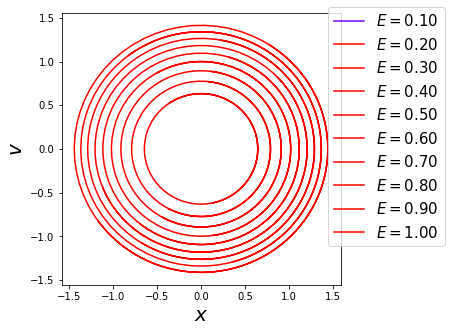

In [11]:
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(5, 5))

NTRY = 10
EMIN = 0.1
EMAX = 1.0
E = np.linspace(EMIN, EMAX, NTRY)
X0 = np.random.uniform(-1.0, 1.0, NTRY)
V0 = np.sqrt(2*E - W*W*X0*X0)
for i in range(0, NTRY) : 
    # solving the differential equation
    state0 = np.array([X0[i], V0[i]])
    t = np.linspace(0, 10, 100) # dt = 0.1
    state = odeint(derivatives, state0, t)

    # Plot
    x = state[:,0]
    v = state[:,1]
    plt.plot(x, v, '-', color = cm.rainbow(i*256/NTRY), label=r'$E = %.2f$' % (E[i])) 

# end plot
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$v$', fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(1.4, 1.05))

# Phase space for non-linear oscillator
Now let's move to a non-linear oscillator, described by the equation
\begin{equation}
\ddot x  + \omega^2 \sin x = 0
\end{equation}
Of course, the solution is not harmonic unless $x$ is very small. How is the phase space now?

(-6, 6)

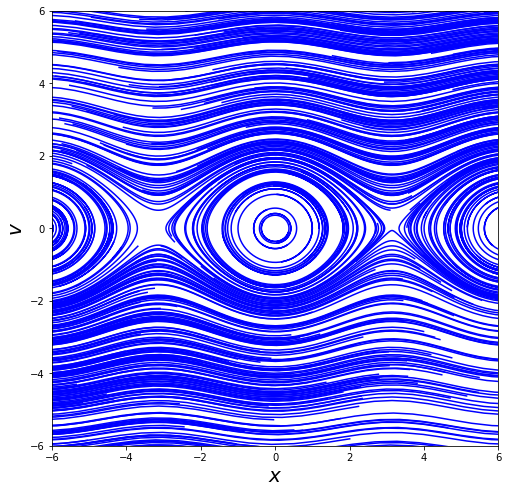

In [13]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# global parameters
W = 0.98 # angular frequency

# function to return the derivatives
def derivatives(state, t): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    xd  = state[1]
    xdd = -W*W*(np.sin(state[0]))
    return xd, xdd


# main simulation
fig, ax = plt.subplots(figsize=(8, 8))

NTRY = 1000
np.random.seed(0)
# initial conditions
X0 = np.random.uniform(-10.0, 10.0, NTRY)
V0 = np.random.uniform(-10.0, 10.0, NTRY)
for i in range(0, NTRY) : 

    # solving the differential equation
    state0 = np.array([X0[i], V0[i]])
    t = np.linspace(0, 10, 100) # dt = 0.1
    state = odeint(derivatives, state0, t)

    # Plot
    x = state[:,0]
    v = state[:,1]
    plt.plot(x, v, 'b-') 

# end plot
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$v$', fontsize=20)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
#plt.legend(fontsize=15, bbox_to_anchor=(1.4, 1.05))

These are orbits, in the phase space, which are never touching each other. Due to the conservation of energy.

# Including disiipation

We will now include a viscous dissipation of the form $-b\dot x = -bv$, which will dissipate energy and brings th system into rest. We will use low dissipation. The differential equation is now
\begin{equation}
\ddot x -b\dot x + \omega^2 \sin x = 0.
\end{equation}



(-6, 6)

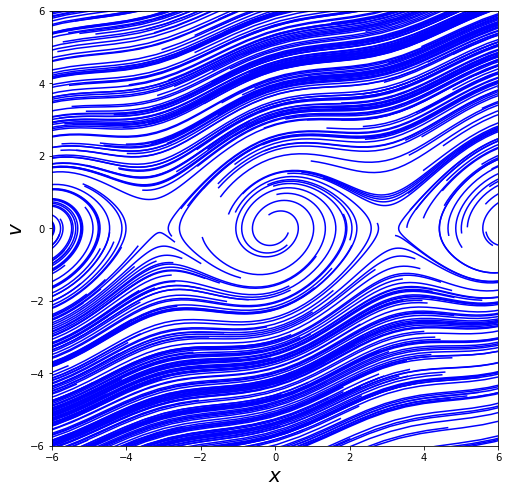

In [15]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# global parameters
W = 0.98 # angular frequency
B = 0.30 # dissipation

# function to return the derivatives
def derivatives(state, t=0): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    xd  = state[1]
    xdd = -W*W*(np.sin(state[0])) + B*state[1]
    return xd, xdd

# main simulation
fig, ax = plt.subplots(figsize=(8, 8))

NTRY = 1000
np.random.seed(0)
# initial conditions
X0 = np.random.uniform(-10.0, 10.0, NTRY)
V0 = np.random.uniform(-10.0, 10.0, NTRY)
for i in range(0, NTRY) : 

    # solving the differential equation
    state0 = np.array([X0[i], V0[i]])
    t = np.linspace(0, 10, 100) # dt = 0.1
    state = odeint(derivatives, state0, t)

    # Plot
    x = state[:,0]
    v = state[:,1]
    plt.plot(x, v, 'b-') 

# end plot
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$v$', fontsize=20)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
#plt.legend(fontsize=15, bbox_to_anchor=(1.4, 1.05))


As you can see, the orbits are now tilted to null velocity, an effect which increases with $b$

# Exercise
Study the same dynamics for the non-linear oscillator described by 
\begin{equation}
\ddot x + \omega^2 x^\lambda = 0,
\end{equation}
with $\lambda$ odd . What is the effect on the phase space trajectories?

# The vectorial phase plane

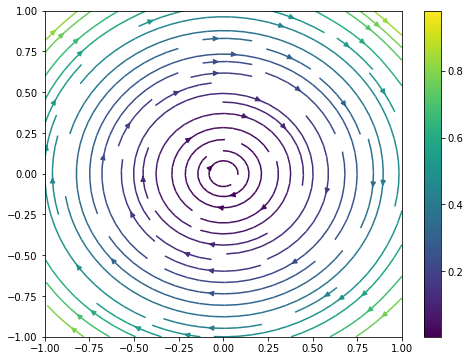

In [16]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# global parameters
W = 0.98 # angular frequency

# function to return the derivatives
def derivatives(state, t=0): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    xd  = state[1]
    #xdd = -W*W*(np.sin(state[0]))
    xdd = -W*W*((state[0]))
    return [xd, xdd]



N = 20
MIN = -1.0
MAX = 1.0
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))
DX, DY = derivatives([X, Y])
E = 0.5*X*X + 0.5*W*W*Y*Y

fig = plt.figure(figsize=(8,6))
#ax.quiver(X, Y, DX, DY, M, pivot='mid')
#ax.quiver(X, Y, DX, DY)
plt.streamplot(X, Y, DX, DY, color=E)
plt.colorbar()

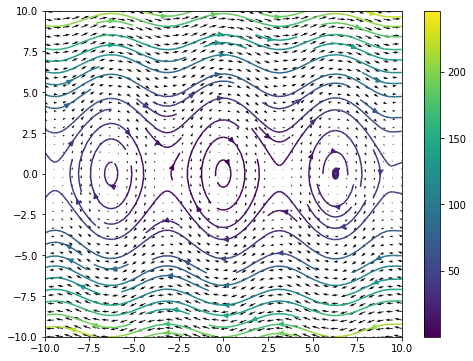

In [17]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# global parameters
W = 1.98 # angular frequency
B = 2.31

# function to return the derivatives
def derivatives(state, t=0): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    xd  = state[1]
    xdd = -W*W*(np.sin(state[0]))
    #xdd = -W*W*((state[0]))
    return [xd, xdd]



N = 40
MIN = -10.0
MAX = 10.0
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))
DX, DY = derivatives([X, Y])
E = 0.5*X*X + 0.5*W*W*Y*Y

fig = plt.figure(figsize=(8,6))
#plt.quiver(X, Y, DX, DY, M, pivot='mid')
plt.quiver(X, Y, DX, DY)
plt.streamplot(X, Y, DX, DY, color=E)
plt.colorbar()

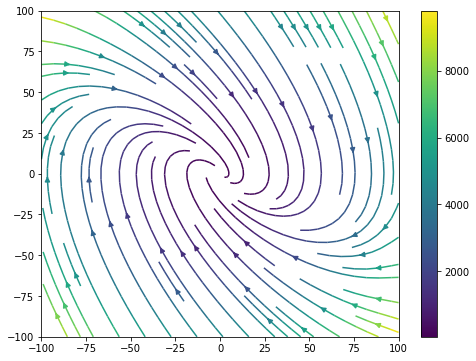

In [18]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# global parameters
W = 0.98 # angular frequency
B = 1.31

# function to return the derivatives
def derivatives(state, t=0): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    xd  = state[1]
    #xdd = -W*W*(np.sin(state[0]))
    #xdd = -W*W*((state[0]))
    xdd = -W*W*((state[0])) -B*state[1]
    return [xd, xdd]



N = 20
MIN = -100.0
MAX = 100.0
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))
DX, DY = derivatives([X, Y])
E = 0.5*X*X + 0.5*W*W*Y*Y

fig = plt.figure(figsize=(8,6))
#ax.quiver(X, Y, DX, DY, M, pivot='mid')
#plt.quiver(X, Y, DX, DY)
plt.streamplot(X, Y, DX, DY, color=E)
plt.colorbar()

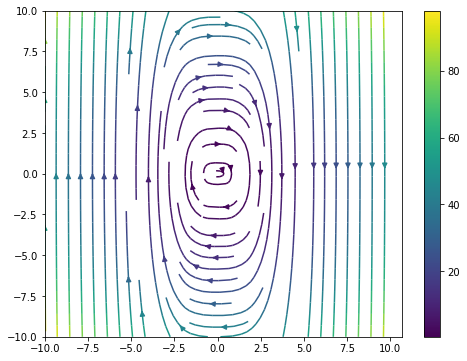

In [19]:
# A non-linear oscillator
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# global parameters
W = 0.98 # angular frequency
ALPHA = 3

# function to return the derivatives
def derivatives(state, t=0): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    xd  = state[1]
    #xdd = -W*W*(np.sin(state[0]))
    #xdd = -W*W*((state[0]))
    xdd = -W*W*((state[0])**ALPHA)
    return [xd, xdd]

N = 20
MIN = -10.0
MAX = 10.0
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))
DX, DY = derivatives([X, Y])
E = 0.5*X*X + 0.5*W*W*Y**2 # Is this correct?

fig = plt.figure(figsize=(8,6))
#ax.quiver(X, Y, DX, DY, M, pivot='mid')
#plt.quiver(X, Y, DX, DY)
plt.streamplot(X, Y, DX, DY, color=E)
plt.colorbar()

# Linear Stability Analysis
A two dimensional linear system can be written as
\begin{align}
    \dot x &= ax + by,\\
    \dot y &= cx + dy,
\end{align}
or, equivalently,
\begin{equation}
    \dot{\vec{x}} = \mathbf{A} \vec x =     
    \left[ 
     \begin{array}{c}
            \dot x \\ \dot y
     \end{array} 
     \right] = 
    \begin{bmatrix}
        a & b \\
        c & d
    \end{bmatrix}
        \left[ 
     \begin{array}{c}
            x \\ y
     \end{array} 
     \right].
\end{equation}

As you cpuld suspect, all the solutions properties are encoded inside the matrix $A$. Fixed points occur wehenever $\dot{\vec x} = \vec 0$. From the definition, $(0, 0)$ is always a fixed point. In the case of the harmonic oscillator, the origin is called a focus (since all orbits are around it but never touch it). For the damped harmonic oscillator, the origin is called an stable equilibrium point, snce it attracts all the trajectories in the phase plane. Soon we will learn more classifications.

Let's take a system where $a$ is arbitrary, $b = c = 0$, and $d = -1$. The solution for this systems is, clearly,
\begin{align}
    x(t) &= x_0e^{at},\\ 
    y(t) &= y_0 e^{-t}.
\end{align}
Let's plot the phase portrait for several key values for $a$.

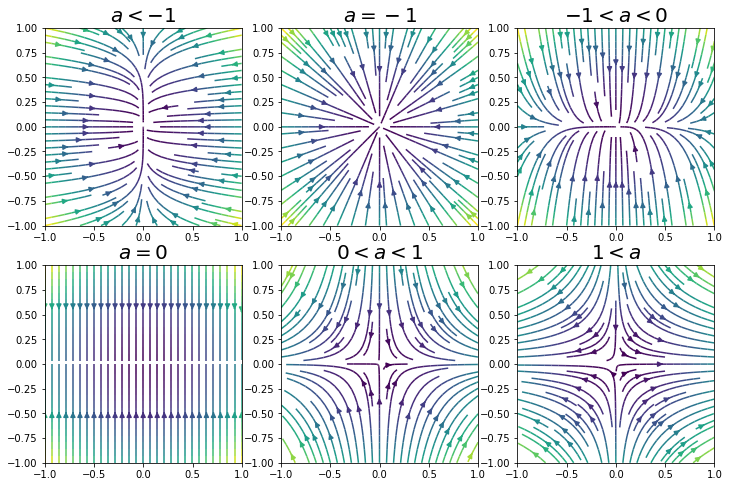

In [21]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12,8))
# function to return the derivatives
def derivatives(state, A = 1.0, t=0): 
    xd  = A*state[0]
    yd = -state[1]
    return [xd, yd]

N = 30
MIN = -1.0
MAX = 1.0
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))
E = X*X + Y*Y

A = [-5.0, -1.0, -0.2, 0, 0.5, 1.5] 
L = [r"$a < -1$", r"$a = -1$", r"$-1 < a < 0$", r"$a = 0$", r"$0 < a < 1$", r"$1 < a$"]
for iA in range(len(A)) :
    DX, DY = derivatives([X, Y], A[iA])
    axes[int(iA/3), iA%3].streamplot(X, Y, DX, DY, color=E)
    axes[int(iA/3), iA%3].set_xlim(MIN, MAX)
    axes[int(iA/3), iA%3].set_ylim(MIN, MAX)
    axes[int(iA/3), iA%3].set_title(L[iA], fontsize=20)


For $a<-1$, we have a **stable node**, and you can see that $x$ decays faster to zero than $y$. When $a = -1$, we have a very symmetrical case where both decaying rates are the same: the equilibrium point is called a **star**. When $-a < a < 0$ we again have a stable node at the origin, but now the solutions decays faster along the $y$ direction. When $a=0$, $x$ does not change at all ,$x(t) = x_0$, and we have a family of stable nodes along the $x$-axis, or a **line of fixed points**. Finally, when $a > 0$, most trajectories are unstable and diverge to infinity, except for those where $x = 0$, the $y$ axis, they go to the origin. Here, the origin is called a **saddle-point**. 

It is possible to show that the solution to the previous matrix system of differential equations depends completely on the eigenvalues of the matrix (Do it by replacing an exponential anzats). For a two dimensonal system, the characteristic equation bring us to the following expression for the eigen-value: $\lambda^2 - \tau\lambda + \Delta = 0$, where $\tau = tr(A)$ and $\Delta = \det (A) = ad - bc$. Therefore, we have two roots:
\begin{align}
    \lambda_1 =& \frac{\tau + \sqrt{\tau^2 - 4\Delta}}{2}, \\
    \lambda_2 =& \frac{\tau - \sqrt{\tau^2 - 4\Delta}}{2}.
\end{align}
If the eigen-values are distinc, the eigen-vectors are independent, and we have 
\begin{align}
    \vec x(t) &= c_1e^{\lambda_1 t}\vec{v_1} + c_2 e^{\lambda_2 t}\vec{v_2}, \\
    \vec{x_0} &= c_1\vec{v_1} + c_2\vec{v_2}.
\end{align}

***Example***: Let's explore the system described by $a=b=1$, $c = 4$, and $d = -2$, with initial condition $(2, -3)$. 

Evec0 =  [0.70710678 0.70710678]
Evec1 =  [-0.24253563  0.9701425 ]


/Users/oquendo/miniconda3/envs/jupyterlab/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


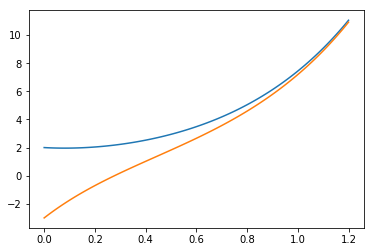

In [23]:
%matplotlib inline
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

# Problem setup
x0 = np.array([2., -3.])
A = np.array([[1., 1.], [4., -2.]])

# eigen vals and vecs
evals, evecs = linalg.eig(A)
print ("Evec0 = ", evecs[:, 0])
print ("Evec1 = ", evecs[:, 1])
# Computing c1 and c2
c = linalg.solve(evecs, x0)
# Plotting the solutions
t = np.linspace(0, 1.2, 100)
plt.plot(t, c[0]*np.exp(evals[0]*t)*evecs[0][0] + c[1]*np.exp(evals[1]*t)*evecs[0][1])
plt.plot(t, c[0]*np.exp(evals[0]*t)*evecs[1][0] + c[1]*np.exp(evals[1]*t)*evecs[1][1])

But, sometimes, you are more interested on the general behavior of the solutions, instead of solving exactly the problem. For instance, the previous example showed that the eigen-directions actually reflect some important long-term behavior for the system. The phase-plane portrait of it is

(-3.1, 3.1)

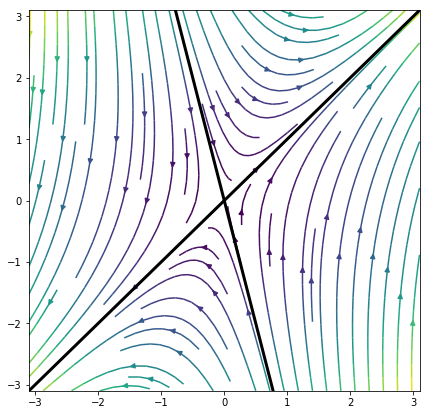

In [24]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(7,7))
# function to return the derivatives
def derivatives(state, A=np.eye(2), t=0): 
    xd = state[0] + state[1]
    yd = 4*state[0] - 2*state[1]
    return [xd, yd]

N = 20
MIN = -3.1
MAX = 3.1
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))
E = X*X + Y*Y

A = np.array([[1., 1.], [4., -2.]])
DX, DY = derivatives([X, Y], A)
ax.streamplot(X, Y, DX, DY, color=E)
x = np.linspace(MIN, MAX, 50)
ax.plot(x, x, lw=3, c='black')
ax.plot(x, -4*x, lw=3, c='black')
ax.set_xlim(MIN, MAX)
ax.set_ylim(MIN, MAX)

As you can see here, the eigen-vectors show the so-called stable and unstable manifolds, which are trayectories going to or diverging from the stable point. In this case, the first eigen-vector shows the diverging direction. The origin is a saddle point. 

> **NOTE**: If the eigen-values are complex, the nodes are either **centers** (closed curves around), or **spirals**.  Centers are neutrally stable, since they do not attract or repel trayectories, while spiral can be stable or unstable.

According to the discriminant of the general linear system, you can have the following (see Strogatz): 

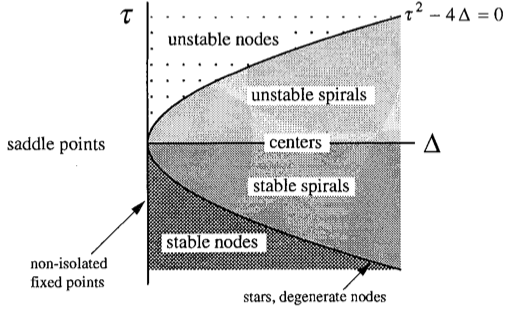

In [25]:
from IPython.display import Image
Image(filename='LinearSystems-Strogatz.png')

> **Exercise:** Verify that the following is indeed the phase-portrait of the system described by $a = 1, b=2, c = 3, d = 4$ and compute and plot the eigenvectors in the same figure. Classify the fixed points.

(-3.1, 3.1)

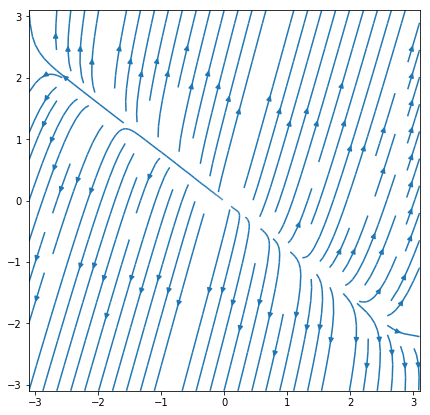

In [26]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(7,7))
# function to return the derivatives
def derivatives(state, A=np.eye(2), t=0): 
    xd = 1*state[0] + 1*state[1]
    yd = 3*state[0] + 4*state[1]
    return [xd, yd]

N = 30
MIN = -3.1
MAX = 3.1
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))

A = np.array([[1., 1.], [4., -2.]])
DX, DY = derivatives([X, Y], A)
ax.streamplot(X, Y, DX, DY)
x = np.linspace(MIN, MAX, 50)
ax.set_xlim(MIN, MAX)
ax.set_ylim(MIN, MAX)

#Chaos in the non-linear driven pendulum

As a final example of a chaotic system, we will explore the dynamics of the non-linear driven damped oscillator, described by 

\begin{equation}
\frac{d^2\theta}{dt^2} = -\frac{g}{l} \sin\theta - q\frac{d\theta}{dt} + F_D \sin(\Omega_D t).
\end{equation}
Of course, you need you transform this second order equation into a coupled system of two first order equations. Let's explore the dynamics as function of the force amplitud $F_D$, while fixing the remaining parameters to $q = 1/2, l = g = 9.8, \Omega_D = 2/3, \theta_0 = 0.2, \omega_0 = 0$. A typical time series from this system is 

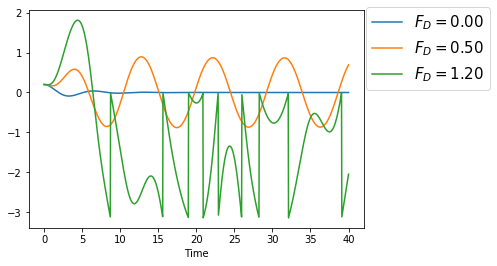

In [27]:
# global imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# global parameters
Q = 1.0/2.0
G = 9.8
L = 9.8
WD = 2.0/3.0

# initial conditions
X0 = 0.2
V0 = 0.0

# function to return the derivatives
def derivatives(state, t, FD): 
    xd  = state[1]
    yd = -G*np.sin(state[0])/L - Q*state[1] + FD*np.sin(WD*t)
    return xd, yd

# solving the differential equation
state0 = np.array([X0, V0])
t = np.linspace(0, 40, 1000) # dt = 0.1

for FD in [0.0, 0.5, 1.2] :
    state = odeint(derivatives, state0, t, (FD,))
    # Plot the solution
    plt.plot(t, np.fmod(state[:,0], np.pi), '-', label=r"$F_D = %.2f$"%(FD))
    
plt.xlabel('Time')
#plt.ylabel('$x, v$', fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(1.4, 1.05))

# Sensitivity to initial conditions
For $F_D = 1.2$, we can check if two nearby trajectories diverge (exponentially), which is a signature of chaos

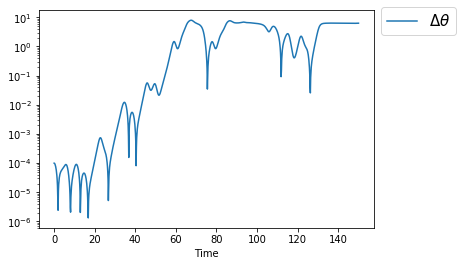

In [28]:
# global imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# global parameters
Q = 1.0/2.0
G = 9.8
L = 9.8
WD = 2.0/3.0

# initial conditions
V0 = 0.0

# function to return the derivatives
def derivatives(state, t, FD): 
    xd  = state[1]
    yd = -G*np.sin(state[0])/L - Q*state[1] + FD*np.sin(WD*t)
    return xd, yd

# solving the differential equation
t = np.linspace(0, 150, 1000) # dt = 0.01

FD = 1.2
X0 = 0.2
state0 = np.array([X0, V0])
state1 = odeint(derivatives, state0, t, (FD,))
X0 = 0.2001
state0 = np.array([X0, V0])
state2 = odeint(derivatives, state0, t, (FD,))
    
# Plot the difference
plt.plot(t, np.abs(state1[:,0] - state2[:, 0]), '-', label=r"$\Delta \theta$")
plt.yscale("log")

plt.xlabel('Time')
#plt.ylabel('$x, v$', fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.05))

As you can see, there is an exponential grow on the difference of the two trajectories, which is a signature of chaos. (The exponential behaviour is at the beginning if the curve, since its trend is linear in a semilog plot). This also shows that the Lyapunov exponent is larger than zero.

# Phase portrait

Let's compare the phase portrait for $F_D = 0.5$ and $F_D = 1.2$

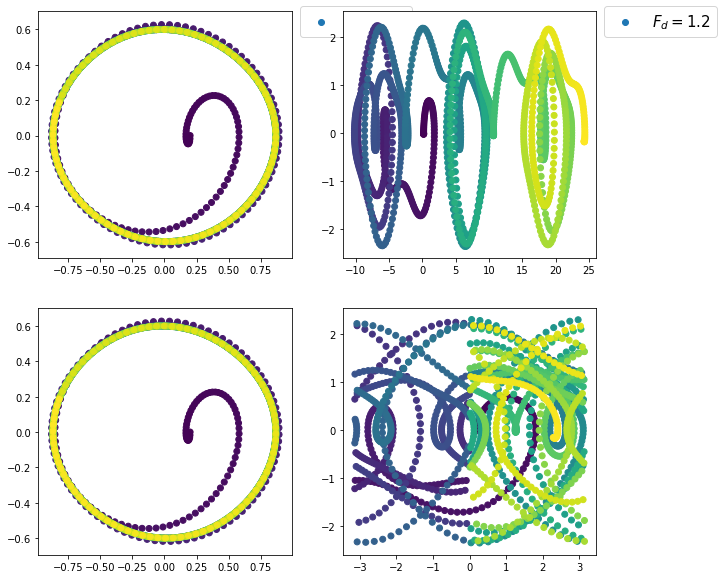

In [29]:
# global imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm

# global parameters
Q = 1.0/2.0
G = 9.8
L = 9.8
WD = 2.0/3.0

# initial conditions
V0 = 0.0
X0 = 0.2

# function to return the derivatives
def derivatives(state, t, FD): 
    xd  = state[1]
    yd = -G*np.sin(state[0])/L - Q*state[1] + FD*np.sin(WD*t)
    return xd, yd

# solving the differential equation
t = np.arange(0, 150, 0.1) # dt = 0.1

FD = 0.5
state0 = np.array([X0, V0])
state1 = odeint(derivatives, state0, t, (FD,))
FD = 1.2
state0 = np.array([X0, V0])
state2 = odeint(derivatives, state0, t, (FD,))
    
# Plot the phase portrait
fig, axes = plt.subplots(2, 2, figsize=(10, 10) )
axes[0, 0].scatter(state1[:,0], state1[:,1], c=t, label=r"$F_d = 0.5$")
axes[1, 0].scatter(np.fmod(state1[:,0], np.pi), state1[:,1], c=t, label=r"$F_d = 0.5$")
axes[0, 1].scatter(state2[:,0], state2[:,1], c=t, label=r"$F_d = 1.2$")
axes[1, 1].scatter(np.fmod(state2[:,0], np.pi), state2[:,1], c=t, label=r"$F_d = 1.2$")

axes[0, 0].legend(fontsize=15, bbox_to_anchor=(1.0, 1.05))
axes[0, 1].legend(fontsize=15, bbox_to_anchor=(1.0, 1.05))

> **Exercise:** Compute the bifurcation diagram.